In [1]:
import math
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from ITMO.util import normalize
from ITMO.SVM.main import *

In [3]:
table = read_csv('./ITMO/knn/dataset.txt', '\t')
xs, ys = make_dataset(table, shuffle=False)
ys = [-1 if y == 0 else 1 for y in ys]
classifier = SVMClassifier(C=2, kernel=kernels.RadialBasis(0.3))
classifier.fit(xs, ys)
ys_pred = classifier.predict(xs)

In [31]:
def show_mesh(train_data, classifier):
    def gen_mesh(train_data):
        x_min = min([point[0] for point in train_data]) - 0.3
        x_max = max([point[0] for point in train_data]) + 0.3
        y_min = min([point[1] for point in train_data]) - 0.3
        y_max = max([point[1] for point in train_data]) + 0.3
        
        h = 0.05
        test_x, test_y = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        return [test_x, test_y]
    
    xs = np.array(train_data[0])
    labels = train_data[1]
    
    test_mesh = gen_mesh(xs)
    test_points = [[coords[0], coords[1]]
                   for coords in zip(test_mesh[0].ravel(), test_mesh[1].ravel())]
    
    classifier.fit(xs, labels)
    predicted_mesh = classifier.predict(test_points)
    
    classColormap = ListedColormap(['#FF0000', '#00FF00'])
    testColormap = ListedColormap(['#FFAAAA', '#AAFFAA'])
    
    predicted_mesh = [0 if y < 0 else 1 for y in predicted_mesh]
    labels = [0 if y < 0 else 1 for y in labels]
    
    plt.pcolormesh(test_mesh[0],
                   test_mesh[1],
                   np.asarray([sample for sample in predicted_mesh]).reshape(test_mesh[0].shape),
                   cmap=testColormap)
    
    plt.scatter([sample[0] for sample in xs],
                [sample[1] for sample in xs], 
                c=[label for label in labels],
                cmap=classColormap)
    plt.show()

<IPython.core.display.Javascript object>


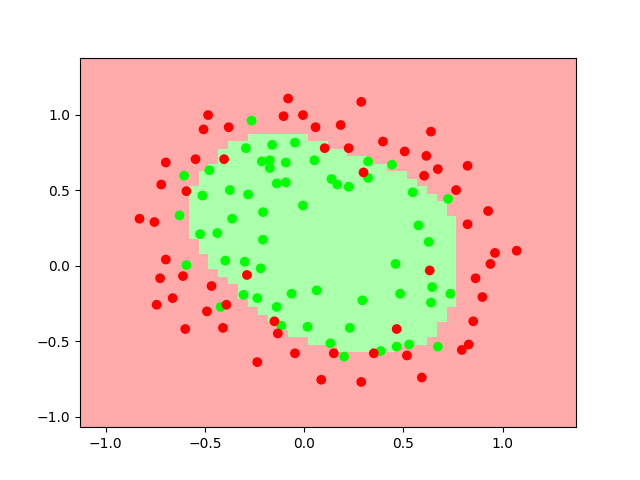

In [37]:
xs, ys = make_dataset(table, shuffle=False)
ys = [-1 if y == 0 else 1 for y in ys]
classifier = SVMClassifier(C=1, kernel=kernels.RadialBasis(0.3))
# xs, _, _ = normalize(np.array(xs))
show_mesh((xs, ys), classifier)

<IPython.core.display.Javascript object>


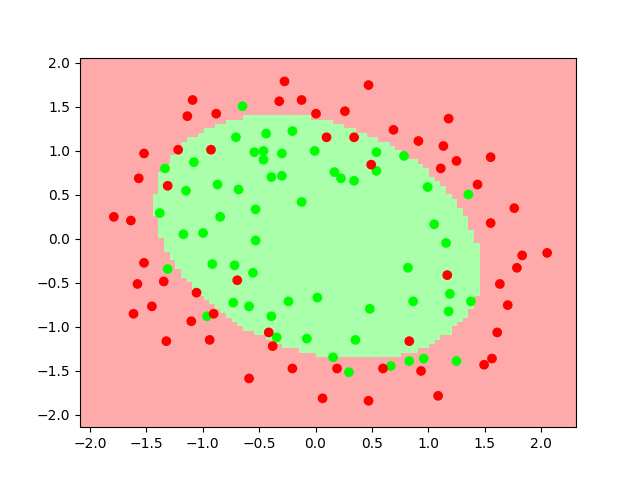

In [36]:
xs, ys = make_dataset(table, shuffle=False)
ys = [-1 if y == 0 else 1 for y in ys]
classifier = SVMClassifier(C=1, kernel=kernels.Polynomial(2, gamma=1))
xs, _, _ = normalize(np.array(xs))
show_mesh((xs, ys), classifier)